# Memoria proyecto ML, predicción del valor de casas prefabricadas 🏠

![casa_título](imagenes/Casa-prefabricada-105-Precio-52800.jpg)

# Índice 📖

1. Definición del proyecto. 
2. Recolección y preparación de los datos.
3. Análisis exploratorio de los datos.
4. Preprocesamiento de los datos.
5. Selección del modelo y entrenamiento de los mismos. 
6. Predicciones con el modelo entrenado.
7. Guardar y cargar el modelo para predicciones futuras.
8. Conclusiones.


# 1. Definición del proyecto ✍🏻

Tras llevar a cabo un análisis exploratorio de datos (EDA) sobre las zonas más rentables para establecer una empresa de viviendas prefabricadas, nuestro cliente ha decidido volver a confiar en nuestros servicios para desarrollar un modelo de Machine Learning que prediga el precio de las casas prefabricadas.

Por lo que el **objetivo principal de nuestro proyecto,** es predecir el precio de una vivienda prefabricada en base a una serie de características (como los metros cuadrados, número de habitaciones y baños, materiales de fabricación etc). 

# 2. Recolección y preparación de los datos 🔎📈

Para la recopilación de los datos, se llevó a cabo una investigación exhaustiva, lo que nos condujo al sitio web [Facilhouse](https://facilhouse.com/). En esta plataforma, empleamos la técnica de **Web Scraping** para extraer la información necesaria. En la ruta data/web_scraping_facilhouse.ipynb se encuentra el documento donde hemos scrapeado los datos, del los cuales hemos obtenido el DataFrame con el que trabajaremos. 

Para que la memoria no quedara tan extensa, hemos decidio poner lo impresecendible, por lo que en el documento [web_scraping_facilhouse.ipynb](data/web_scraping_facilhouse.ipynb) se explica de forma detalla como se han obtenido y limpiado los datos para pasarlos al DataFrame.

En la memoria partiremos desde el DataFrame. 

Los datos que hemos obtenido han sido: metros cuadrados de la vivienda, número de habitaciones y baños, material de contrucción, modelo de la vivienda, empresa y precio.

# 3. Análisis exploratorio de los datos 📊

**Exploración inicial:** Inspeccionaremos el conjunto de datos para verificar si hay valores faltantes, datos atípicos o errores.

**Análisis explotarorio:** Visualización entre las características de las viviendas y el precio utilizando gráficos (por ejemplo, dispersión, histogramas, boxplots). Calcularemos también las estadísticas descriptivas de las variables (media, mediana, desviación estándar, etc.).


In [1]:
#importamos las librerias necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/facil_house.csv", sep=(","))
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0
...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN


In [3]:
df.describe()

,metros_cuadrados,baños,habitaciones,precio
count,721.000000,721.000000,718.000000,375.000000
mean,134.990291,1.825243,2.805014,162344.933333
std,80.756999,0.844903,0.967175,114463.050088
min,10.000000,1.000000,1.000000,20878.000000
25%,75.000000,1.000000,2.000000,71400.000000
50%,120.000000,2.000000,3.000000,130500.000000
75%,176.000000,2.000000,3.000000,226391.000000
max,500.000000,6.000000,6.000000,568850.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   metros_cuadrados  721 non-null    float64
 1   baños             721 non-null    float64
 2   habitaciones      718 non-null    float64
 3   material          722 non-null    object 
 4   modelo            722 non-null    object 
 5   empresa           716 non-null    object 
 6   precio            375 non-null    float64
dtypes: float64(4), object(3)
memory usage: 39.6+ KB


Podemos observar que todas las columnas, excepto **material** y **modelo**, contienen valores nulos (NaN). Nos enfocamos en la columna **Precio**, ya que es la que presenta la mayor cantidad de valores nulos, además es nuestra variable a precir (o de salida). Esto se debe a que, durante el proceso de **web scraping**, encontramos que en muchos casos no se especificaba el precio, sino que aparecía el texto "Consultar", lo que se tradujo en valores nulos en la columna correspondiente.

Aunque una opción sería calcular la media de la columna **Precio** y usarla para rellenar los valores nulos, esta alternativa no es viable, ya que no estamos tratando con unos pocos valores faltantes, sino con 347 registros nulos, casi la mitad de la columna. Este enfoque podría sesgar o afectar significativamente el rendimiento de nuestro modelo de **Machine Learning**.

Por lo tanto, la solución más efectiva será entrenar el modelo de **Machine Learning** utilizando un conjunto reducido de variables. En total, trabajaremos con 375 registros completos, sin incluir aquellos con valores nulos en **Precio**.

Pasamos al análisis exploratorio con la visualización de los datos para observar cuáles son las variables más relevantes respecto a precio.

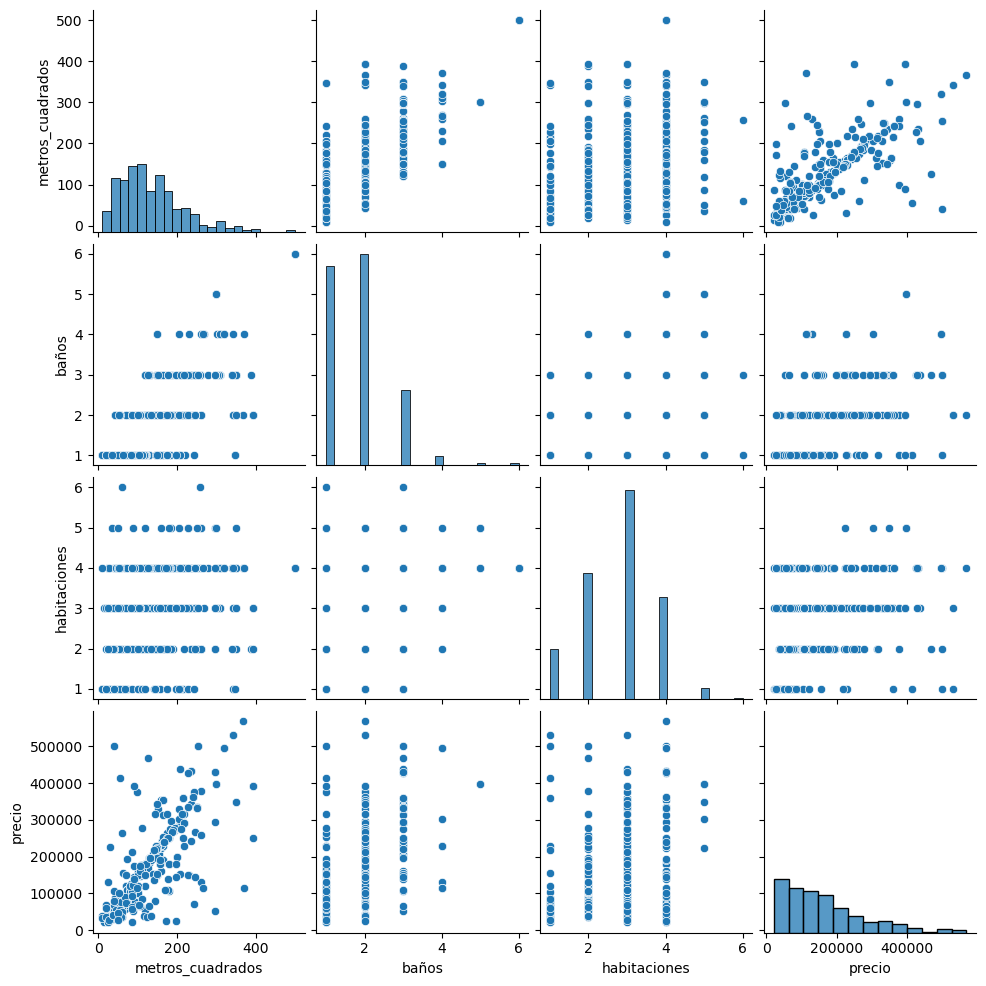

In [5]:
sns.pairplot(df)

<Axes: >

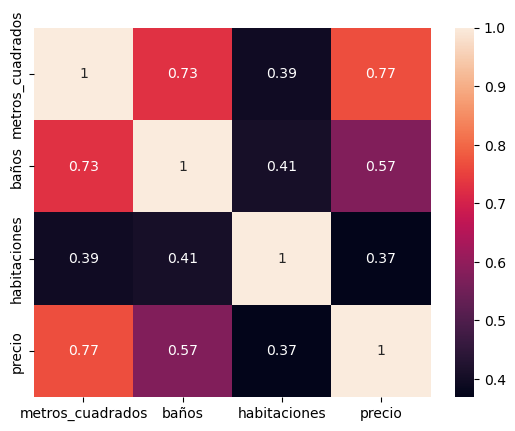

In [6]:
sns.heatmap(df[["metros_cuadrados", "baños", "habitaciones", "precio"]].corr(), annot=True)

En el siguiente heatmap se puede observar una fuerte correlación entre la variable "metros cuadrados" y la variable "precio", seguida por la variable "baños". 

Sin embargo, las variables "empresa", "modelo" y "material" no están siendo consideradas, ya que son de tipo categórico y no numérico. Por lo tanto, el próximo paso será realizar un procesamiento de datos para transformar estas variables no numéricas de manera adecuada.

# 4. Preprocesamiento de los datos 👩🏽‍💻

Convertiremos las variables "material", "modelo" y "empresa" a formato categórico.

En primer lugar, nos enfocaremos en la variable "materiales". Para ello, procederemos a dividir los valores por la (",") y crearemos una columna para cada material. De este modo, cada columna será binaria, asignando un valor de 1 si el material está presente y 0 si no lo está.


In [7]:
print(df.loc[:, "material"])

0      acero,hormigón,madera
1                     madera
2      acero,hormigón,madera
3                     madera
4                     madera
               ...          
717                   madera
718                   madera
719                   madera
720                   madera
721                    acero
Name: material, Length: 722, dtype: object


In [8]:
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0
...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN


In [9]:
# Crear las columnas adicionales para 'acero', 'hormigón' y 'madera'
df['acero'] = df['material'].apply(lambda x: 1 if 'acero' in x else 0)
df['hormigón'] = df['material'].apply(lambda x: 1 if 'hormigón' in x else 0)
df['madera'] = df['material'].apply(lambda x: 1 if 'madera' in x else 0)


In [10]:
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio,acero,hormigón,madera
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0,1,1,1
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN,0,0,1
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0,1,1,1
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0,0,0,1
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN,0,0,1
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN,0,0,1
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN,0,0,1
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN,0,0,1


Para la columna empresa, lo que haremos será usar la técnica de **LabelEncoder** para asignar un valor numérico único a cada una. 

In [11]:
df["empresa"].value_counts()

empresa
Mi Casa de Madera               51
Modiko                          51
Forest House                    43
Grupo CUNI                      34
Casastar                        33
                                ..
Home Center                      3
ABS American Building System     2
Quarta Paret                     1
Shekari                          1
Hormitech                        1
Name: count, Length: 63, dtype: int64

In [12]:
import sklearn
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
df["empresas"] = encoder.fit_transform(df["empresa"])
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio,acero,hormigón,madera,empresas
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0,1,1,1,22
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN,0,0,1,46
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0,1,1,1,62
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0,0,0,1,18
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0,0,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN,0,0,1,11
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN,0,0,1,37
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN,0,0,1,36
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN,0,0,1,46


A continuación, trabajaremos con la variable "modelo". En este caso, utilizaremos la técnica de **LabelEncoder**, ya que existen numerosos modelos y crear una columna para cada uno resultaría inviable y poco eficiente.

In [13]:
df["modelo"].value_counts()

modelo
Modelo T1                6
Tarragona                6
Barcelona                6
Victoria                 6
Modelo 100005            5
                        ..
Palawan                  1
ECO 78.2.1               1
Cabrejas                 1
Johana                   1
Casa prefabricada 174    1
Name: count, Length: 449, dtype: int64

In [14]:
df["modelo_vivienda"] = encoder.fit_transform(df["modelo"])
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio,acero,hormigón,madera,empresas,modelo_vivienda
0,73.0,2.0,2.0,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0,1,1,1,22,281
1,105.0,1.0,2.0,madera,Casa Prefabricada 105,Norges Hus,NaN,0,0,1,46,58
2,185.0,2.0,3.0,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0,1,1,1,62,446
3,130.0,2.0,3.0,madera,Riekko,Forest House,181300.0,0,0,1,18,360
4,161.0,2.0,4.0,madera,Ailo,Forest House,241500.0,0,0,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...
717,298.0,3.0,2.0,madera,Visitante,Casastar,NaN,0,0,1,11,429
718,64.0,1.0,NaN,madera,Badajoz 298,Madereco,NaN,0,0,1,37,25
719,174.0,2.0,NaN,madera,Casa 64,Madercás,NaN,0,0,1,36,47
720,36.0,1.0,NaN,madera,Casa prefabricada 174,Norges Hus,NaN,0,0,1,46,65


Ahora lo que haremos será guardarnos las variables modelo y empresa en un df con sus respectivas columnas en un df por si en algún momento las necesitamos cotejar. 

In [15]:
df_modelo_empresa = df[["modelo", "modelo_vivienda", "empresa", "empresas"]]
df_modelo_empresa

,modelo,modelo_vivienda,empresa,empresas
0,Modelo B2H BS,281,Grupo CUNI,22
1,Casa Prefabricada 105,58,Norges Hus,46
2,Zaero Masía Rustico,446,ZAEROWORKING SL,62
3,Riekko,360,Forest House,18
4,Ailo,2,Forest House,18
...,...,...,...,...
717,Visitante,429,Casastar,11
718,Badajoz 298,25,Madereco,37
719,Casa 64,47,Madercás,36
720,Casa prefabricada 174,65,Norges Hus,46


El siguiente paso será rellenar las variables de entrada (x) con la media de su respectiva columna y pasándolas a int. Dichas variables son: "metros_cuadrados", "baños", "habitaciones"

In [16]:
df.describe()

,metros_cuadrados,baños,habitaciones,precio,acero,hormigón,madera,empresas,modelo_vivienda
count,721.000000,721.000000,718.000000,375.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,134.990291,1.825243,2.805014,162344.933333,0.361496,0.146814,0.627424,32.085873,225.783934
std,80.756999,0.844903,0.967175,114463.050088,0.480767,0.354166,0.483826,17.207338,129.437331
min,10.000000,1.000000,1.000000,20878.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1.000000,2.000000,71400.000000,0.000000,0.000000,0.000000,18.000000,116.000000
50%,120.000000,2.000000,3.000000,130500.000000,0.000000,0.000000,1.000000,35.000000,227.000000
75%,176.000000,2.000000,3.000000,226391.000000,1.000000,0.000000,1.000000,43.000000,337.000000
max,500.000000,6.000000,6.000000,568850.000000,1.000000,1.000000,1.000000,63.000000,448.000000


Metros cuadrados = aproximamos a 135 metros cuadrados

Baños = aproximamos a 2 baños

Habitaciones = aproximamos a 3 habitaciones

In [17]:
df["metros_cuadrados"] = df["metros_cuadrados"].fillna(135)
df["baños"] = df["baños"].fillna(2)
df["habitaciones"] = df["habitaciones"].fillna(3)
df[["metros_cuadrados", "baños", "habitaciones"]] = df[["metros_cuadrados", "baños", "habitaciones"]].astype(int)
df

,metros_cuadrados,baños,habitaciones,material,modelo,empresa,precio,acero,hormigón,madera,empresas,modelo_vivienda
0,73,2,2,"acero,hormigón,madera",Modelo B2H BS,Grupo CUNI,109500.0,1,1,1,22,281
1,105,1,2,madera,Casa Prefabricada 105,Norges Hus,NaN,0,0,1,46,58
2,185,2,3,"acero,hormigón,madera",Zaero Masía Rustico,ZAEROWORKING SL,297400.0,1,1,1,62,446
3,130,2,3,madera,Riekko,Forest House,181300.0,0,0,1,18,360
4,161,2,4,madera,Ailo,Forest House,241500.0,0,0,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...
717,298,3,2,madera,Visitante,Casastar,NaN,0,0,1,11,429
718,64,1,3,madera,Badajoz 298,Madereco,NaN,0,0,1,37,25
719,174,2,3,madera,Casa 64,Madercás,NaN,0,0,1,36,47
720,36,1,3,madera,Casa prefabricada 174,Norges Hus,NaN,0,0,1,46,65


Una vez ya hemos connvertido las variables metros cuadrados, baños, habitaciones, material, modelo y empresa, pasaremos a eliminar las columnas repetidas (material, modelo y empresa) y además eliminaremos los nans de precio para posteriormente pasarlo a int

In [18]:
df_limpio = df.copy()

In [19]:
df_1 = df_limpio.copy()

In [20]:
df = df_1.drop(columns=["material", "modelo", "empresa"])

In [21]:
df_2 = df

In [22]:
df_2 = df_2.dropna(subset=["precio"])

In [23]:
df = df_2

In [24]:
df["precio"] = df["precio"].astype(int)
df

,metros_cuadrados,baños,habitaciones,precio,acero,hormigón,madera,empresas,modelo_vivienda
0,73,2,2,109500,1,1,1,22,281
2,185,2,3,297400,1,1,1,62,446
3,130,2,3,181300,0,0,1,18,360
4,161,2,4,241500,0,0,1,18,2
6,208,2,3,291200,0,0,1,18,178
...,...,...,...,...,...,...,...,...,...
708,176,1,2,316100,0,0,1,58,305
710,49,1,3,28000,0,0,1,47,333
711,20,1,1,61000,1,0,0,1,195
712,103,1,3,67087,0,0,1,53,343


Ahora que tenemos el df limpio, volveremos a mirar la correlación de las variables para saber cuáles usar en nuestro modelo y así mimso normalizar los datos si fuera necesario.

<Axes: >

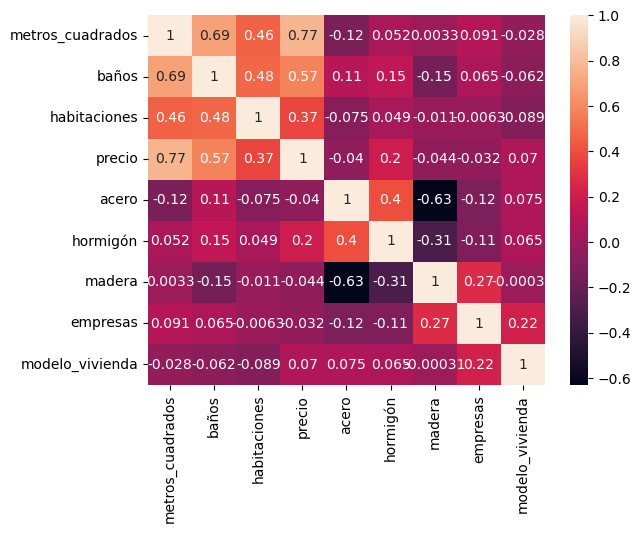

In [25]:
sns.heatmap(df.corr(), annot=True)

Se observa que las variables metros cuadrados, baños, habitaciones y hormigón presentan la correlación más alta respecto a la variable precio, mientras que las variables acero, madera y modelo de vivienda muestran una correlación negativa con el precio. Sin embargo, el modelo de vivienda tiene una correlación muy débil, cercana a 0.07.

# 5. Selección de los modelos de ML y entrenamiento de los mismos 🎯🔎

Los modelos con los que entrenaremos nuestro proyecto de ML serán **Random Forest** y **XGBoost**

## Random Forest 

Se ha tenido en cuenta dicho modelo debido a la sensisbilidad de nuestros datos. Debido a que Random Forest nos ofrece un modelo robusto que puede manejar tanto relaciones lineales como no lineales. 

En primer lugar, evaluaremos la necesidad de normalizar los datos. Dado que utilizaremos Random Forest, no será necesario normalizar los datos, ya que éste algoritmo no requiere esa transformación para su entrenamiento. Esto se debe a que las particiones que realizan en los datos no dependen de la escala de las características.

### Train - Test Split


In [26]:
X = df[["metros_cuadrados", "baños", "habitaciones", "hormigón", "modelo_vivienda"]]
y = df["precio"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train", X_train.shape)
print("X_train", X_test.shape)
print("X_train", y_train.shape)
print("X_train", y_test.shape)

X_train (300, 5)
X_train (75, 5)
X_train (300,)
X_train (75,)


### Entrenamiento del modelo

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

### Primera evaluación del modelo

Las métricas que se han tenido en cuenta para este caso son 

- RMSE (qué tan bien el modelo predice los precios en términos de precios).

- MAE: Para medir el error promedio en unidades absolutas.

- R²: Para obtener una idea general de cuánta varianza está capturando nuestro modelo.


In [28]:
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE test:", mean_absolute_error(y_test, y_pred))
print("R2 test:", r2_score(y_test, y_pred))

RMSE test: 70167.98733130231
MAE test: 43848.114577777786
R2 test: 0.560841970658591


El modelo es útil, pero hay margen para mejorarlo. 

El R² de 0.56 sugiere que más de la mitad de la variabilidad de los precios de las casas está siendo explicada, pero aún queda mucho espacio para mejorar.

Los valores de RMSE y MAE indican que los errores del modelo son bastante grandes, lo que podría afectar la precisión de las predicciones en casos específicos.

Por lo que el siguiente paso será realizar un ajuste de hiperparámetros.

### Ajuste de hiperparámetros con GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

# Definimos el conjunto de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, None],      
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],    
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]      
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featur

/opt/miniconda3/envs/sklearn_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/sklearn_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/sklearn_env/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/miniconda3/envs/sklearn_env/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    val

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [30]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [31]:
gbc_random_forest = RandomForestRegressor(random_state=42, **grid_search_rf.best_params_)

In [32]:
gbc_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=50, random_state=42)

In [33]:
predictions_random_forest = gbc_random_forest.predict(X_test)

### Segunda evaluaciación de los datos 
Donde observamos que gracias al ajuste de hiperparámetros hemos conseguido mejorar el modelo. 

In [34]:
print("RMSE test GS:", np.sqrt(mean_squared_error(y_test, predictions_random_forest)))
print("MAE test GS:", mean_absolute_error(y_test, predictions_random_forest))
print("R2 test GS:", r2_score(y_test, predictions_random_forest))

RMSE test GS: 65317.36925247176
MAE test GS: 41726.76396616937
R2 test GS: 0.6194601368946229


## XGBoost

En el modelo anterior no hemos considerado la normalización de los datos, pero en este caso sí la implementaremos. Aunque XGBoost no requiere necesariamente de normalización, dado que contamos con un número reducido de muestras, la normalización es importante para evitar posibles problemas de sobreajuste (overfitting) y mejorar la generalización del modelo. Para ello usaremos la técnica StandarScaler.

### Normalización de los datos con StandarScaler y entrenamiento del modelo

In [35]:
from sklearn.preprocessing import StandardScaler

X_normalizado = df[["metros_cuadrados", "baños", "habitaciones", "hormigón", "modelo_vivienda"]]
y = df["precio"]

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

scaler_1 = StandardScaler()

X_train_scaled = scaler_1.fit_transform(X_train)
X_test_scaled = scaler_1.transform(X_test)

### Entrenamiento del modelo con XGBoost

In [36]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train_scaled, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [37]:
y_pred_xgb = xg_reg.predict(X_test_scaled)

In [38]:
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE test:", mean_absolute_error(y_test, y_pred_xgb))
print("R2 test:", r2_score(y_test, y_pred_xgb))

RMSE test: 62657.48359965042
MAE test: 44456.95453125
R2 test: 0.6498221755027771


Observamos como normalizando los datos y realizando el modelo con XGBoost hemos obtenido un R2 de 0.64, un poco mejor que incluso habiendo realizado un ajuste de hiperparámtros con Random Forest

### Ajuste de hiperparámetros con GridSearch

In [39]:
xgbreg_model = XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [3, 6, 10],          
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.7, 0.8, 1.0],      
    'colsample_bytree': [0.7, 0.8, 1.0],  
    'min_child_weight': [1, 3, 5]      
}

grid_search_xgbreg = GridSearchCV(
    estimator=xgbreg_model,         # El modelo de XGBoost
    param_grid=param_grid,       # El espacio de parámetros
    scoring='neg_mean_squared_error',  # Métrica de evaluación (negativa porque GridSearchCV maximiza la puntuación)
    cv=9,                        # Número de pliegues en la validación cruzada
    n_jobs=-1,                   # Usar todos los núcleos disponibles para acelerar la búsqueda
    verbose=1                     # Imprimir información sobre el progreso
)

grid_search_xgbreg.fit(X_train_scaled, y_train)

Fitting 9 folds for each of 729 candidates, totalling 6561 fits


/opt/miniconda3/envs/sklearn_env/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=9,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [40]:
grid_search_xgbreg.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 50,
 'subsample': 1.0}

In [41]:
gbc_xgbg = XGBRegressor(random_state=42, **grid_search_xgbreg.best_params_)

In [42]:
gbc_xgbg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [43]:
predictions_xgbregressor = gbc_xgbg.predict(X_test_scaled)

In [44]:
print("RMSE test GS:", np.sqrt(mean_squared_error(y_test, predictions_xgbregressor)))
print("MAE test GS:", mean_absolute_error(y_test, predictions_xgbregressor))
print("R2 test GS:", r2_score(y_test, predictions_xgbregressor))

RMSE test GS: 61944.342974603045
MAE test GS: 36924.00924479167
R2 test GS: 0.6577478647232056


## SVMRegressor

Utilizaremos tambien SVM ya que es muy eficaz cuando las relaciones entre las características y el precio de la casas son complejas pero no necesariamente lineales.

Usamos los datos normalizados.

In [45]:
from sklearn.svm import SVR

X_normalizado = df[["metros_cuadrados", "baños", "habitaciones", "hormigón", "modelo_vivienda"]]
y = df["precio"]

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Entrenamiento del modelo con SVR

In [46]:
svm_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

svm_model.fit(X_train_scaled, y_train)

SVR(C=100)

In [47]:
y_pred_svr = svm_model.predict(X_test_scaled)

print("RMSE test SVR:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("MAE test SVR:", mean_absolute_error(y_test, y_pred_svr))
print("R2 test SVR:", r2_score(y_test, y_pred_svr))

RMSE test SVR: 111309.13626237075
MAE test SVR: 85481.20248982984
R2 test SVR: -0.10510721375843612


Observamos como el valor de R2 que nos da el modelo es negativo, por lo que no se tendrá en cuenta este modelo para su uso.

# 6. Predicciones con el modelo entrenado ✅

Finalmente, para nuestro modelo de Machine Learning, seleccionaremos **XGBoost**, ya que ha proporcionado los mejores resultados sin necesidad de realizar un ajuste exhaustivo de los hiperparámetros. Los resultados obtenidos son los siguientes: un **RMSE** de 61,944.34  un **MAE** de 36,924.00 y un **R²** de 0.65. Sin embargo, es importante señalar que este modelo aún es susceptible de mejora debido a la limitada cantidad de datos disponibles. Por lo tanto, sería recomendable volver a entrenar el modelo en el futuro, cuando se disponga de más datos proporcionados por el cliente así como un mayor presupuesto, lo que mejoraría su rendimiento.

Generamos una muestra nueva para predecir el valor de la casa prefabricada en base a las variables de entrada:

In [48]:
casa_1 = pd.DataFrame ({
    "metros_cuadrados" : [120],
    "baños" : [2],
    "habitaciones": [3],
    "hormigón": [0],
    "modelo_vivienda": [281]
})

nueva_casa_1 = scaler.transform(casa_1)

prediccion_precio = gbc_xgbg.predict(nueva_casa_1)

print(f'El precio estimado de la casa es: {prediccion_precio[0]}')

El precio estimado de la casa es: 127864.9609375


In [49]:
casa_2 = np.asarray([120, 2, 3, 0, 281]).reshape(1, -1)
nueva_casa_2 = scaler_1.transform(casa_2)
prediccion_precio_2 = gbc_xgbg.predict(nueva_casa_2)

print(f'El precio estimado de la casa es: {prediccion_precio_2[0]}')

El precio estimado de la casa es: 127864.9609375


/opt/miniconda3/envs/sklearn_env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 7. Guardar y cargar el modelo para predicciones futuras ⬇️

In [50]:
import joblib

#Guardar el modelo entrenado
joblib.dump(gbc_xgbg, "modelo_xgb.pkl")

['modelo_xgb.pkl']

Teniendo en cuenta que hemos normalizados los datos con StandarScaler, también necesitaremos guardar estos para nuestro modelo:

In [51]:
import pickle 
with open ("scaler_xgb.pkl", "wb") as f:
    pickle.dump(scaler, f)
    
# Lo comentamos para que no se no guarde un archivo nuevo cada vez que lo ejecutamos

### Ejemplo de cargar el modelo para hacer predicciones 

```python
# Cargar el modelo guardado
xg_reg_cargado = joblib.load("modelo/modelo_prediccion_precios_casas_prefab.pkl") #poner la ruta del modelo desde donde te encuentres

# Hacer predicciones con el modelo cargado
predicciones = xg_reg_cargado.predict(nuevos_datos)

# Mostrar las predicciones
print(predicciones)
```

# 8. Conclusiones 🧐

Dado el tamaño limitado de nuestra muestra de datos, nos enfocamos en los modelos de **Ensembles de Árboles**, que son conocidos por ofrecer buenos resultados en escenarios con pocos datos. En particular, utilizamos **Random Forest**, que nos dio un rendimiento de \( R^2 = 0.61 \) tras el ajuste de los hiperparámetros, y **XGBoost**, que alcanzó un \( R^2 = 0.65 \) con el mismo ajuste. Debido a su mejor desempeño, optamos por quedarnos con **XGBoost**.

Aunque también exploramos el uso de **SVM**, debido a su capacidad para capturar relaciones complejas pero no necesariamente lineales entre las características y el precio de las casas, los resultados obtenidos fueron negativos, con un \( R^2 = -0.105 \), lo que hizo que descartáramos esta opción.